### **Pengolahan Fungsi Transfer Perancangan Sistem Instrumentasi**

Muhammad Ario Bagus Prakusa
<br>
17/410187/TK/45544

In [ ]:
!pip install control
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
from control.matlab import *
from scipy import signal
import matplotlib.pyplot as plt

#### **Input Fungsi Transfer**


In [ ]:
# Persamaan Feed Wash Oil, Diesel Oil, Gas Oil
eq1 = ([4.8482,53.3302, 49.694, 12.1205],[1, 22, 142.012, 241.249, 320.584, 205.21, 50.32])
G1 = ctl.tf([4.8482,53.3302, 49.694, 12.1205],[1, 22, 142.012, 241.249, 320.584, 205.21, 50.32])
print("Fungsi Transfer Sistem Umpan FCCU")
print(G1) 

Fungsi Transfer Sistem Umpan FCCU

            4.848 s^3 + 53.33 s^2 + 49.69 s + 12.12
----------------------------------------------------------------
s^6 + 22 s^5 + 142 s^4 + 241.2 s^3 + 320.6 s^2 + 205.2 s + 50.32



In [ ]:
# Persamaan Pre-Heater 
eq2 = ([7.81, 85.92, 76.15, -21.48, -19.52],
    [0.4, 4.4, 3.7, -3.2, 4.34, 7.24, -1.56, -1.562])
eq2_t=([7.67, 91.82, 158.4, 74.25],
    [0.1, 1.2, 8.238, 13.078, 5.94]) # Setelah PID Tuning
G2 = ctl.tf([7.81, 85.92, 76.15, -21.48, -19.52],
    [0.4, 4.4, 3.7, -3.2, 4.34, 7.24, -1.56, -1.562])
print("Fungsi Transfer Sistem Outlet Pre-Heater Temperature")
print(G2) 
G2 = ctl.tf([7.67, 91.82, 158.4, 74.25],
    [0.1, 1.2, 8.238, 13.078, 5.94])
print("Fungsi Transfer Sistem Outlet Pre-Heater Temperature (Setelah Tuning)")
print(G2) 

Fungsi Transfer Sistem Outlet Pre-Heater Temperature

             7.81 s^4 + 85.92 s^3 + 76.15 s^2 - 21.48 s - 19.52
----------------------------------------------------------------------------
0.4 s^7 + 4.4 s^6 + 3.7 s^5 - 3.2 s^4 + 4.34 s^3 + 7.24 s^2 - 1.56 s - 1.562

Fungsi Transfer Sistem Outlet Pre-Heater Temperature (Setelah Tuning)

    7.67 s^3 + 91.82 s^2 + 158.4 s + 74.25
----------------------------------------------
0.1 s^4 + 1.2 s^3 + 8.238 s^2 + 13.08 s + 5.94



In [ ]:
# Persamaan Tekanan Reaktor Reaktor
eq3 = ([23.15, 182.8, 182.8, 168.3, 59.87],[0.58, 4.58, 21.07, 17.92, 16.92, 6.346])
G3 = ctl.tf([23.15, 182.8, 182.8, 168.3, 59.87],[0.58, 4.58, 21.07, 17.92, 16.92, 6.346])
print("Fungsi Transfer Tekanan Reaktor")
print(G3) 

Fungsi Transfer Tekanan Reaktor

     23.15 s^4 + 182.8 s^3 + 182.8 s^2 + 168.3 s + 59.87
-------------------------------------------------------------
0.58 s^5 + 4.58 s^4 + 21.07 s^3 + 17.92 s^2 + 16.92 s + 6.346



In [ ]:
# Persamaan Beda Tekanan Reaktor
eq4 = ([0.0001, 0.002, 0.0037, 0.00182],
       [0.0612, 1.357, 4.819, 6.9230, 4.5142, 1.115, 0.00096])
G4 = ctl.tf([0.0001, 0.002, 0.0037, 0.00182],
            [0.0612, 1.357, 4.819, 6.9230, 4.5142, 1.115, 0.00096])
print("Fungsi Transfer Perbedaan Tekanan Reaktor-Regenerator")
print(G4) 

# Persamaan Beda Tekanan Reaktor (Setelah Tuning)
eq4_t=(    [0.313, 6.324, 11.708, 5.697],
       [0.055, 1.11, 5.074, 7.039, 3.019])
G4_t = ctl.tf(    [0.313, 6.324, 11.708, 5.697],
       [0.055, 1.11, 5.074, 7.039, 3.019])
print("Fungsi Transfer Perbedaan Tekanan Reaktor-Regenerator (Setelah Tuning")
print(G4_t) 

#eq4 = ([0.1663, 3.189, 3.023],[0.055, 1.055, 4.023, 3.023])
#G4 = ctl.tf([0.1663, 3.189, 3.023],[0.055, 1.055, 4.023, 3.023])

Fungsi Transfer Perbedaan Tekanan Reaktor-Regenerator

                  0.0001 s^3 + 0.002 s^2 + 0.0037 s + 0.00182
------------------------------------------------------------------------------
0.0612 s^6 + 1.357 s^5 + 4.819 s^4 + 6.923 s^3 + 4.514 s^2 + 1.115 s + 0.00096

Fungsi Transfer Perbedaan Tekanan Reaktor-Regenerator (Setelah Tuning

      0.313 s^3 + 6.324 s^2 + 11.71 s + 5.697
--------------------------------------------------
0.055 s^4 + 1.11 s^3 + 5.074 s^2 + 7.039 s + 3.019



## **Fungsi Transfer Sistem Umpan FCCU**

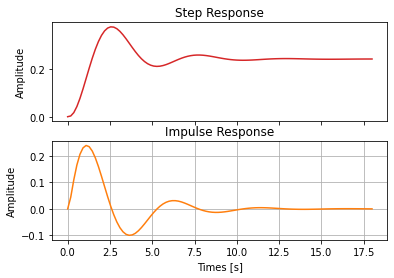

In [ ]:
# Step Response & Impulse Response EQ-1
t, y = signal.step2(eq1)
a, c = signal.impulse2(eq1)

# Sub-plot
fig, axs = plt.subplots(2)
axs[0].plot(t, y, 'tab:red')
axs[0].set_title('Step Response')
axs[1].plot(a, c, 'tab:orange')
axs[1].set_title('Impulse Response')

for ax in axs.flat:
    ax.set(xlabel='Times [s]', ylabel='Amplitude')

for ax in axs.flat:
    ax.label_outer()

# plt.legend(loc="upper right")
# axs[0].xlabel('Time [s]')
# axs[0].ylabel('Amplitude')
# axs[1].xlabel('Time [s]')
# axs[0].ylabel('Amplitude')
# plt.title('Step response & Impulse Response')
plt.grid()

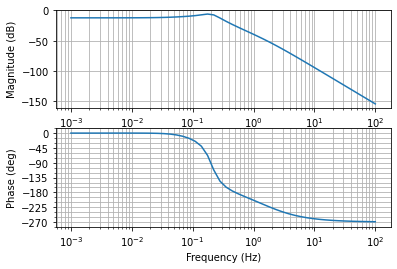

In [ ]:
sys1 = ctl.tf([4.8482,53.3302, 49.694, 12.1205],[1, 22, 142.012, 241.249, 320.584, 205.21, 50.32])
bode1 = ctl.matlab.bode(sys1, dB=True, Hz=True)

In [ ]:
# Margin
gm, pm, sm, wg, wp, ws= ctl.stability_margins(sys1, returnall=False, epsw=0.0)
print("Gain margin:", gm) # Gain margin
print("Phase margin:", pm) # phase margin
print("Stability margin:", sm) # Stability margin
print("Frequency for gain margin:", wg) # Frequency for gain margin
print("Frequency for phase margin:", wp) # Frequency for phase margin
print("Frequency for stability margin:", ws) # Frequency for stability margin

Gain margin: 18.928895316899364
Phase margin: inf
Stability margin: 0.8123006012964211
Frequency for gain margin: 3.138296604509188
Frequency for phase margin: nan
Frequency for stability margin: 1.6738201098205843


#### **Overshoot, Time Settling, Time Rise**

OS: 55.720000%
Mp: 0.375483
Tr: 1.45
Tp: 2.55
Ts: 10.54


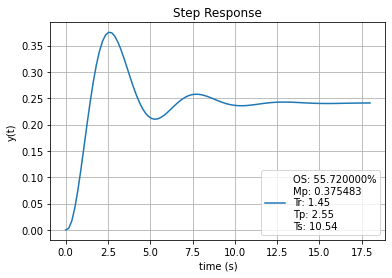

In [ ]:
# Sebelum Tuning
from numpy import min
from scipy import linspace
from scipy.signal import lti, step2
from matplotlib import pyplot as p

tf = lti(   # linear, time-invariant system, rational transfer function
    [4.8482,53.3302, 49.694, 12.1205],[1, 22, 142.012, 241.249, 320.584, 205.21, 50.32]
)

t, y = step2(tf)

p.plot(t, y)
p.title('Step Response')
p.grid()
p.xlabel('time (s)')
p.ylabel('y(t)')

info = "OS: %f%s"%(round((y.max()/y[-1]-1)*100,2),'%')
info += "\nMp: %f" % (y.max())

try:
    Ts = round(t[next(len(y)-i for i in range(2,len(y)-1) if abs(y[-i]/y[-1])<0.98)]-t[0],2)
except StopIteration:
    Ts = "unknown"

try:
    Tr = round(t[next(i for i in range(0,len(y)-1) if y[i]>y[-1]*.90)]-t[0],2)
except StopIteration:
    Tr = "unknown"

try:
    Tp = round(t[next(len(y)-i for i in range(2,len(y)-1) if y[-i] == y.max())]-t[0],2)
except StopIteration:
    Tp = "unknown"

info +="\nTr: %s"%(Tr)
info +="\nTp: %s"%(Tp)
info +="\nTs: %s"%(Ts)
print(info)   # print legend data to stdout as well
p.legend([info], loc=4)

p.show()    # display the step response graph

## **Fungsi Transfer Sistem Outlet Pre-Heater Temperature**

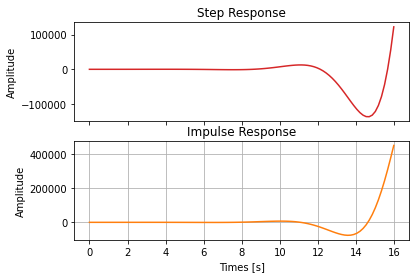

In [ ]:
# Step Response & Impulse Response EQ-1
t, y = signal.step2(eq2)
a, c = signal.impulse2(eq2)

# Sub-plot
fig, axs = plt.subplots(2)
axs[0].plot(t, y, 'tab:red')
axs[0].set_title('Step Response')
axs[1].plot(a, c, 'tab:orange')
axs[1].set_title('Impulse Response')

for ax in axs.flat:
    ax.set(xlabel='Times [s]', ylabel='Amplitude')

for ax in axs.flat:
    ax.label_outer()

# plt.legend(loc="upper right")
# axs[0].xlabel('Time [s]')
# axs[0].ylabel('Amplitude')
# axs[1].xlabel('Time [s]')
# axs[0].ylabel('Amplitude')
# plt.title('Step response & Impulse Response')
plt.grid()

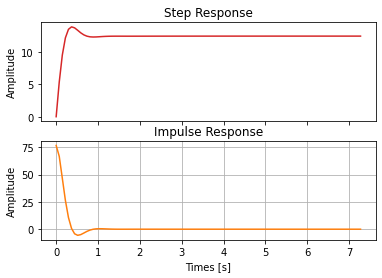

In [ ]:
# Sesudah Tuning
# Step Response & Impulse Response EQ-1
t, y = signal.step2(eq2_t)
a, c = signal.impulse2(eq2_t)

# Sub-plot
fig, axs = plt.subplots(2)
axs[0].plot(t, y, 'tab:red')
axs[0].set_title('Step Response')
axs[1].plot(a, c, 'tab:orange')
axs[1].set_title('Impulse Response')

for ax in axs.flat:
    ax.set(xlabel='Times [s]', ylabel='Amplitude')

for ax in axs.flat:
    ax.label_outer()

# plt.legend(loc="upper right")
# axs[0].xlabel('Time [s]')
# axs[0].ylabel('Amplitude')
# axs[1].xlabel('Time [s]')
# axs[0].ylabel('Amplitude')
# plt.title('Step response & Impulse Response')
plt.grid()

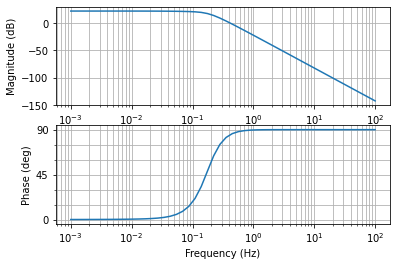

In [ ]:
# Sebelum Tuning
sys2 = ctl.tf([7.81, 85.92, 76.15, -21.48, -19.52],
    [0.4, 4.4, 3.7, -3.2, 4.34, 7.24, -1.56, -1.562])
bode2 = ctl.matlab.bode(sys2, dB=True, Hz=True)

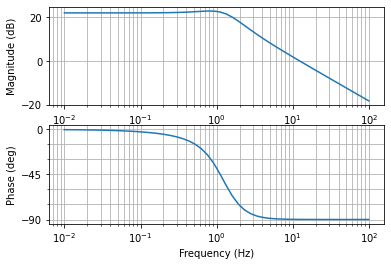

In [ ]:
# Sesudah Tuning
sys2_t = ctl.tf([7.67, 91.82, 158.4, 74.25],
    [0.1, 1.2, 8.238, 13.078, 5.94])
bode2_t = ctl.matlab.bode(sys2, dB=True, Hz=True)

In [ ]:
# Sebelum Tuning 
gm, pm, sm, wg, wp, ws= ctl.stability_margins(sys2, returnall=False, epsw=0.0)
print("Gain margin:", gm) # Gain margin
print("Phase margin:", pm) # phase margin
print("Stability margin:", sm) # Stability margin
print("Frequency for gain margin:", wg) # Frequency for gain margin
print("Frequency for phase margin:", wp) # Frequency for phase margin
print("Frequency for stability margin:", ws) # Frequency for stability margin

Gain margin: inf
Phase margin: -94.99865723254686
Stability margin: inf
Frequency for gain margin: nan
Frequency for phase margin: 2.611582764840433
Frequency for stability margin: nan


In [ ]:
# Sesudah Tuning
gm, pm, sm, wg, wp, ws= ctl.stability_margins(sys2_t, returnall=False, epsw=0.0)
print("Gain margin:", gm) # Gain margin
print("Phase margin:", pm) # phase margin
print("Stability margin:", sm) # Stability margin
print("Frequency for gain margin:", wg) # Frequency for gain margin
print("Frequency for phase margin:", wp) # Frequency for phase margin
print("Frequency for stability margin:", ws) # Frequency for stability margin

Gain margin: inf
Phase margin: 90.0966222485979
Stability margin: inf
Frequency for gain margin: nan
Frequency for phase margin: 77.47916760366734
Frequency for stability margin: nan


#### **Overshoot (OS%), Time Settling (Ts), Time Rise (Tr)** 

OS: 0.000000%
Mp: 122276.844456
Tr: unknown
Tp: unknown
Ts: 15.8


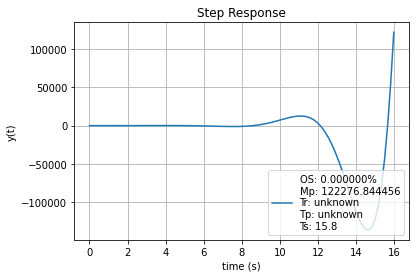

In [ ]:
# Sesudah Tuning
from numpy import min
from scipy import linspace
from scipy.signal import lti, step2
from matplotlib import pyplot as p

tf = lti(   # linear, time-invariant system, rational transfer function
    [7.81, 85.92, 76.15, -21.48, -19.52],
    [0.4, 4.4, 3.7, -3.2, 4.34, 7.24, -1.56, -1.562]
)

t, y = step2(tf)

p.plot(t, y)
p.title('Step Response')
p.grid()
p.xlabel('time (s)')
p.ylabel('y(t)')

info = "OS: %f%s"%(round((y.max()/y[-1]-1)*100,2),'%')
info += "\nMp: %f" % (y.max())

try:
    Ts = round(t[next(len(y)-i for i in range(2,len(y)-1) if abs(y[-i]/y[-1])<0.98)]-t[0],2)
except StopIteration:
    Ts = "unknown"

try:
    Tr = round(t[next(i for i in range(0,len(y)-1) if y[i]>y[-1]*.90)]-t[0],2)
except StopIteration:
    Tr = "unknown"

try:
    Tp = round(t[next(len(y)-i for i in range(2,len(y)-1) if y[-i] == y.max())]-t[0],2)
except StopIteration:
    Tp = "unknown"

info +="\nTr: %s"%(Tr)
info +="\nTp: %s"%(Tp)
info +="\nTs: %s"%(Ts)
print(info)   # print legend data to stdout as well
p.legend([info], loc=4)

p.show()    # display the step response graph

OS: 11.490000%
Mp: 13.936103
Tr: 0.22
Tp: 0.37
Ts: 0.22


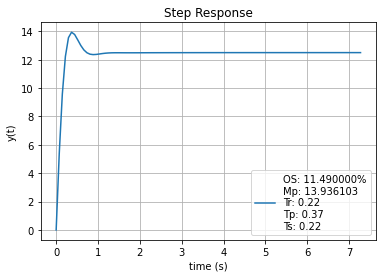

In [ ]:
# Sesudah Tuning
from numpy import min
from scipy import linspace
from scipy.signal import lti, step2
from matplotlib import pyplot as p

tf = lti(   # linear, time-invariant system, rational transfer function
    [7.67, 91.82, 158.4, 74.25],
    [0.1, 1.2, 8.238, 13.078, 5.94]
)

t, y = step2(tf)

p.plot(t, y)
p.title('Step Response')
p.grid()
p.xlabel('time (s)')
p.ylabel('y(t)')

info = "OS: %f%s"%(round((y.max()/y[-1]-1)*100,2),'%')
info += "\nMp: %f" % (y.max())

try:
    Ts = round(t[next(len(y)-i for i in range(2,len(y)-1) if abs(y[-i]/y[-1])<0.98)]-t[0],2)
except StopIteration:
    Ts = "unknown"

try:
    Tr = round(t[next(i for i in range(0,len(y)-1) if y[i]>y[-1]*.90)]-t[0],2)
except StopIteration:
    Tr = "unknown"

try:
    Tp = round(t[next(len(y)-i for i in range(2,len(y)-1) if y[-i] == y.max())]-t[0],2)
except StopIteration:
    Tp = "unknown"

info +="\nTr: %s"%(Tr)
info +="\nTp: %s"%(Tp)
info +="\nTs: %s"%(Ts)
print(info)   # print legend data to stdout as well
p.legend([info], loc=4)

p.show()    # display the step response graph

## **Fungsi Transfer Tekanan Reaktor**

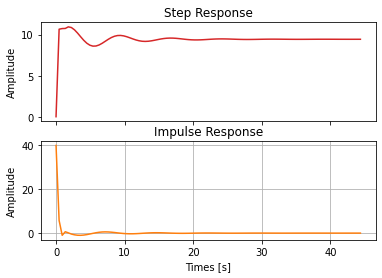

In [ ]:
# Step Response & Impulse Response EQ-1
t, y = signal.step(eq3)
a, c = signal.impulse(eq3)

# Sub-plot
fig, axs = plt.subplots(2)
axs[0].plot(t, y, 'tab:red')
axs[0].set_title('Step Response')
axs[1].plot(a, c, 'tab:orange')
axs[1].set_title('Impulse Response')

for ax in axs.flat:
    ax.set(xlabel='Times [s]', ylabel='Amplitude')

for ax in axs.flat:
    ax.label_outer()

# plt.legend(loc="upper right")
# axs[0].xlabel('Time [s]')
# axs[0].ylabel('Amplitude')
# axs[1].xlabel('Time [s]')
# axs[0].ylabel('Amplitude')
# plt.title('Step response & Impulse Response')
plt.grid()

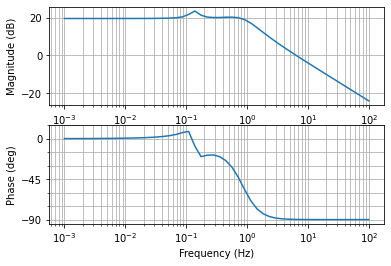

In [ ]:
sys3 = ctl.tf([23.15, 182.8, 182.8, 168.3, 59.87],[0.58, 4.58, 21.07, 17.92, 16.92, 6.346])
bode3 = ctl.matlab.bode(sys3, dB=True, Hz=True)

In [ ]:
gm, pm, sm, wg, wp, ws= ctl.stability_margins(sys3, returnall=False, epsw=0.0)
print("Gain margin:", gm) # Gain margin
print("Phase margin:", pm) # phase margin
print("Stability margin:", sm) # Stability margin
print("Frequency for gain margin:", wg) # Frequency for gain margin
print("Frequency for phase margin:", wp) # Frequency for phase margin
print("Frequency for stability margin:", ws) # Frequency for stability margin

Gain margin: inf
Phase margin: 90.17038066176991
Stability margin: 10.956487751616024
Frequency for gain margin: nan
Frequency for phase margin: 40.593787228126864
Frequency for stability margin: 1.9122266307251277


#### **Overshoot, Time Settling, Time Rise**

OS: 16.040000%
Mp: 10.946637
Tr: 0.45
Tp: 1.79
Ts: 13.9


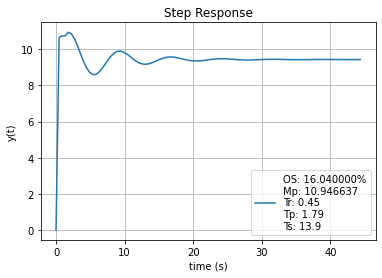

In [ ]:
from numpy import min
from scipy import linspace
from scipy.signal import lti, step2
from matplotlib import pyplot as p

tf = lti(   # linear, time-invariant system, rational transfer function
    [23.15, 182.8, 182.8, 168.3, 59.87],[0.58, 4.58, 21.07, 17.92, 16.92, 6.346]
)

t, y = step2(tf)

p.plot(t, y)
p.title('Step Response')
p.grid()
p.xlabel('time (s)')
p.ylabel('y(t)')

info = "OS: %f%s"%(round((y.max()/y[-1]-1)*100,2),'%')
info += "\nMp: %f" % (y.max())

try:
    Ts = round(t[next(len(y)-i for i in range(2,len(y)-1) if abs(y[-i]/y[-1])<0.98)]-t[0],2)
except StopIteration:
    Ts = "unknown"

try:
    Tr = round(t[next(i for i in range(0,len(y)-1) if y[i]>y[-1]*.90)]-t[0],2)
except StopIteration:
    Tr = "unknown"

try:
    Tp = round(t[next(len(y)-i for i in range(2,len(y)-1) if y[-i] == y.max())]-t[0],2)
except StopIteration:
    Tp = "unknown"

info +="\nTr: %s"%(Tr)
info +="\nTp: %s"%(Tp)
info +="\nTs: %s"%(Ts)
print(info)   # print legend data to stdout as well
p.legend([info], loc=4)

p.show()    # display the step response graph

## **Fungsi Transfer Perbedaan Tekanan Reaktor-Regenerator**

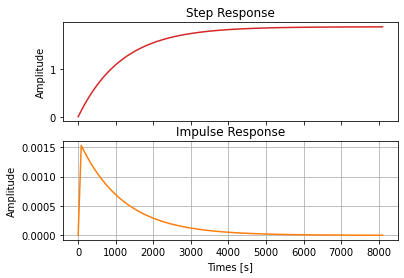

In [ ]:
# Sebelum Tuning
# Perbandingan Step Response & Impulse Response
t, y = signal.step(eq4)
a, c = signal.impulse(eq4)

# Sub-plot
fig, axs = plt.subplots(2)
axs[0].plot(t, y, 'tab:red')
axs[0].set_title('Step Response')
axs[1].plot(a, c, 'tab:orange')
axs[1].set_title('Impulse Response')

for ax in axs.flat:
    ax.set(xlabel='Times [s]', ylabel='Amplitude')

for ax in axs.flat:
    ax.label_outer()

# plt.legend(loc="upper right")
# axs[0].xlabel('Time [s]')
# axs[0].ylabel('Amplitude')
# axs[1].xlabel('Time [s]')
# axs[0].ylabel('Amplitude')
# plt.title('Step response & Impulse Response')
plt.grid()

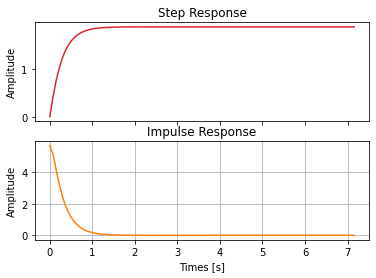

In [ ]:
# Sesudah Tuning
# Perbandingan Step Response & Impulse Response
t, y = signal.step(eq4_t)
a, c = signal.impulse(eq4_t)

# Sub-plot
fig, axs = plt.subplots(2)
axs[0].plot(t, y, 'tab:red')
axs[0].set_title('Step Response')
axs[1].plot(a, c, 'tab:orange')
axs[1].set_title('Impulse Response')

for ax in axs.flat:
    ax.set(xlabel='Times [s]', ylabel='Amplitude')

for ax in axs.flat:
    ax.label_outer()

# plt.legend(loc="upper right")
# axs[0].xlabel('Time [s]')
# axs[0].ylabel('Amplitude')
# axs[1].xlabel('Time [s]')
# axs[0].ylabel('Amplitude')
# plt.title('Step response & Impulse Response')
plt.grid()

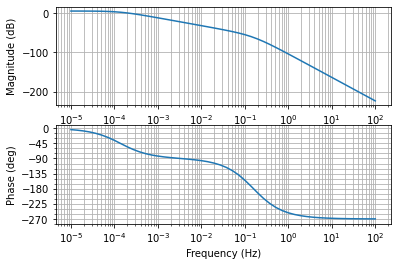

In [ ]:
# Sebelum Tuning
bode4 = ctl.matlab.bode(G4, dB=True, Hz=True)

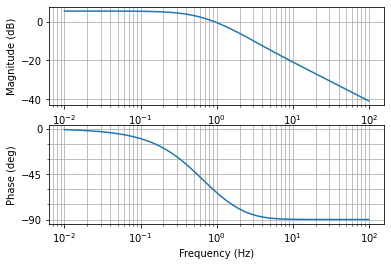

In [ ]:
# Sesudah Tuning
bode4_t = ctl.matlab.bode(G4_t, dB=True, Hz=True)

In [ ]:
# Sebelum Tuning
gm, pm, sm, wg, wp, ws= ctl.stability_margins(G4, returnall=False, epsw=0.0)
print("Gain margin:", gm) # Gain margin
print("Phase margin:", pm) # phase margin
print("Stability margin:", sm) # Stability margin
print("Frequency for gain margin:", wg) # Frequency for gain margin
print("Frequency for phase margin:", wp) # Frequency for phase margin
print("Frequency for stability margin:", ws) # Frequency for stability margin

Gain margin: 1224.4673436922396
Phase margin: 121.67349787085664
Stability margin: 0.996943399998028
Frequency for gain margin: 0.995048843668025
Frequency for phase margin: 0.001391603020464994
Frequency for stability margin: 0.1437806206961133


In [ ]:
# Sesudah Tuning
gm, pm, sm, wg, wp, ws= ctl.stability_margins(G4_t, returnall=False, epsw=0.0)
print("Gain margin:", gm) # Gain margin
print("Phase margin:", pm) # phase margin
print("Stability margin:", sm) # Stability margin
print("Frequency for gain margin:", wg) # Frequency for gain margin
print("Frequency for phase margin:", wp) # Frequency for phase margin
print("Frequency for stability margin:", ws) # Frequency for stability margin

Gain margin: inf
Phase margin: 118.64433307812124
Stability margin: inf
Frequency for gain margin: nan
Frequency for phase margin: 5.883646235161971
Frequency for stability margin: nan


### **Overshoot (OS%), Time Settling (Ts), Time Rise (Tp)**

OS: 0.000000%
Mp: 1.894101
Tr: 2700.6
Tp: unknown
Ts: 4419.17


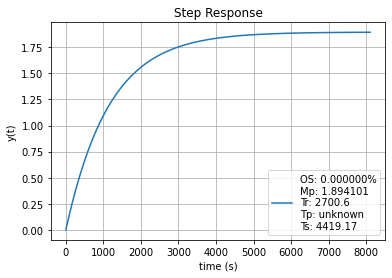

In [ ]:
# Sebelum Tuning
from numpy import min
from scipy import linspace
from scipy.signal import lti, step2
from matplotlib import pyplot as p

tf = lti(   # linear, time-invariant system, rational transfer function
    [0.0001, 0.002, 0.0037, 0.00182],
       [0.0612, 1.357, 4.819, 6.9230, 4.5142, 1.115, 0.00096]
)

t, y = step2(tf)

p.plot(t, y)
p.title('Step Response')
p.grid()
p.xlabel('time (s)')
p.ylabel('y(t)')

info = "OS: %f%s"%(round((y.max()/y[-1]-1)*100,2),'%')
info += "\nMp: %f" % (y.max())

try:
    Ts = round(t[next(len(y)-i for i in range(2,len(y)-1) if abs(y[-i]/y[-1])<0.98)]-t[0],2)
except StopIteration:
    Ts = "unknown"

try:
    Tr = round(t[next(i for i in range(0,len(y)-1) if y[i]>y[-1]*.90)]-t[0],2)
except StopIteration:
    Tr = "unknown"

try:
    Tp = round(t[next(len(y)-i for i in range(2,len(y)-1) if y[-i] == y.max())]-t[0],2)
except StopIteration:
    Tp = "unknown"

info +="\nTr: %s"%(Tr)
info +="\nTp: %s"%(Tp)
info +="\nTs: %s"%(Ts)
print(info)   # print legend data to stdout as well
p.legend([info], loc=4)

p.show()    # display the step response graph

OS: 0.000000%
Mp: 1.887043
Tr: 0.65
Tp: unknown
Ts: 1.01


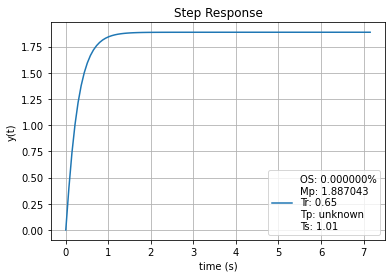

In [ ]:
# Setelah TUning
from numpy import min
from scipy import linspace
from scipy.signal import lti, step2
from matplotlib import pyplot as p

tf = lti(   # linear, time-invariant system, rational transfer function
    [0.313, 6.324, 11.708, 5.697],
       [0.055, 1.11, 5.074, 7.039, 3.019]
)

t, y = step2(tf)

p.plot(t, y)
p.title('Step Response')
p.grid()
p.xlabel('time (s)')
p.ylabel('y(t)')

info = "OS: %f%s"%(round((y.max()/y[-1]-1)*100,2),'%')
info += "\nMp: %f" % (y.max())

try:
    Ts = round(t[next(len(y)-i for i in range(2,len(y)-1) if abs(y[-i]/y[-1])<0.98)]-t[0],2)
except StopIteration:
    Ts = "unknown"

try:
    Tr = round(t[next(i for i in range(0,len(y)-1) if y[i]>y[-1]*.90)]-t[0],2)
except StopIteration:
    Tr = "unknown"

try:
    Tp = round(t[next(len(y)-i for i in range(2,len(y)-1) if y[-i] == y.max())]-t[0],2)
except StopIteration:
    Tp = "unknown"

info +="\nTr: %s"%(Tr)
info +="\nTp: %s"%(Tp)
info +="\nTs: %s"%(Ts)
print(info)   # print legend data to stdout as well
p.legend([info], loc=4)

p.show()    # display the step response graph